In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
cars=pd.read_csv('/content/second_hand_cars.csv')
cars.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [7]:
missing_values=cars.isnull().sum()
print(missing_values)

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64


<Axes: >

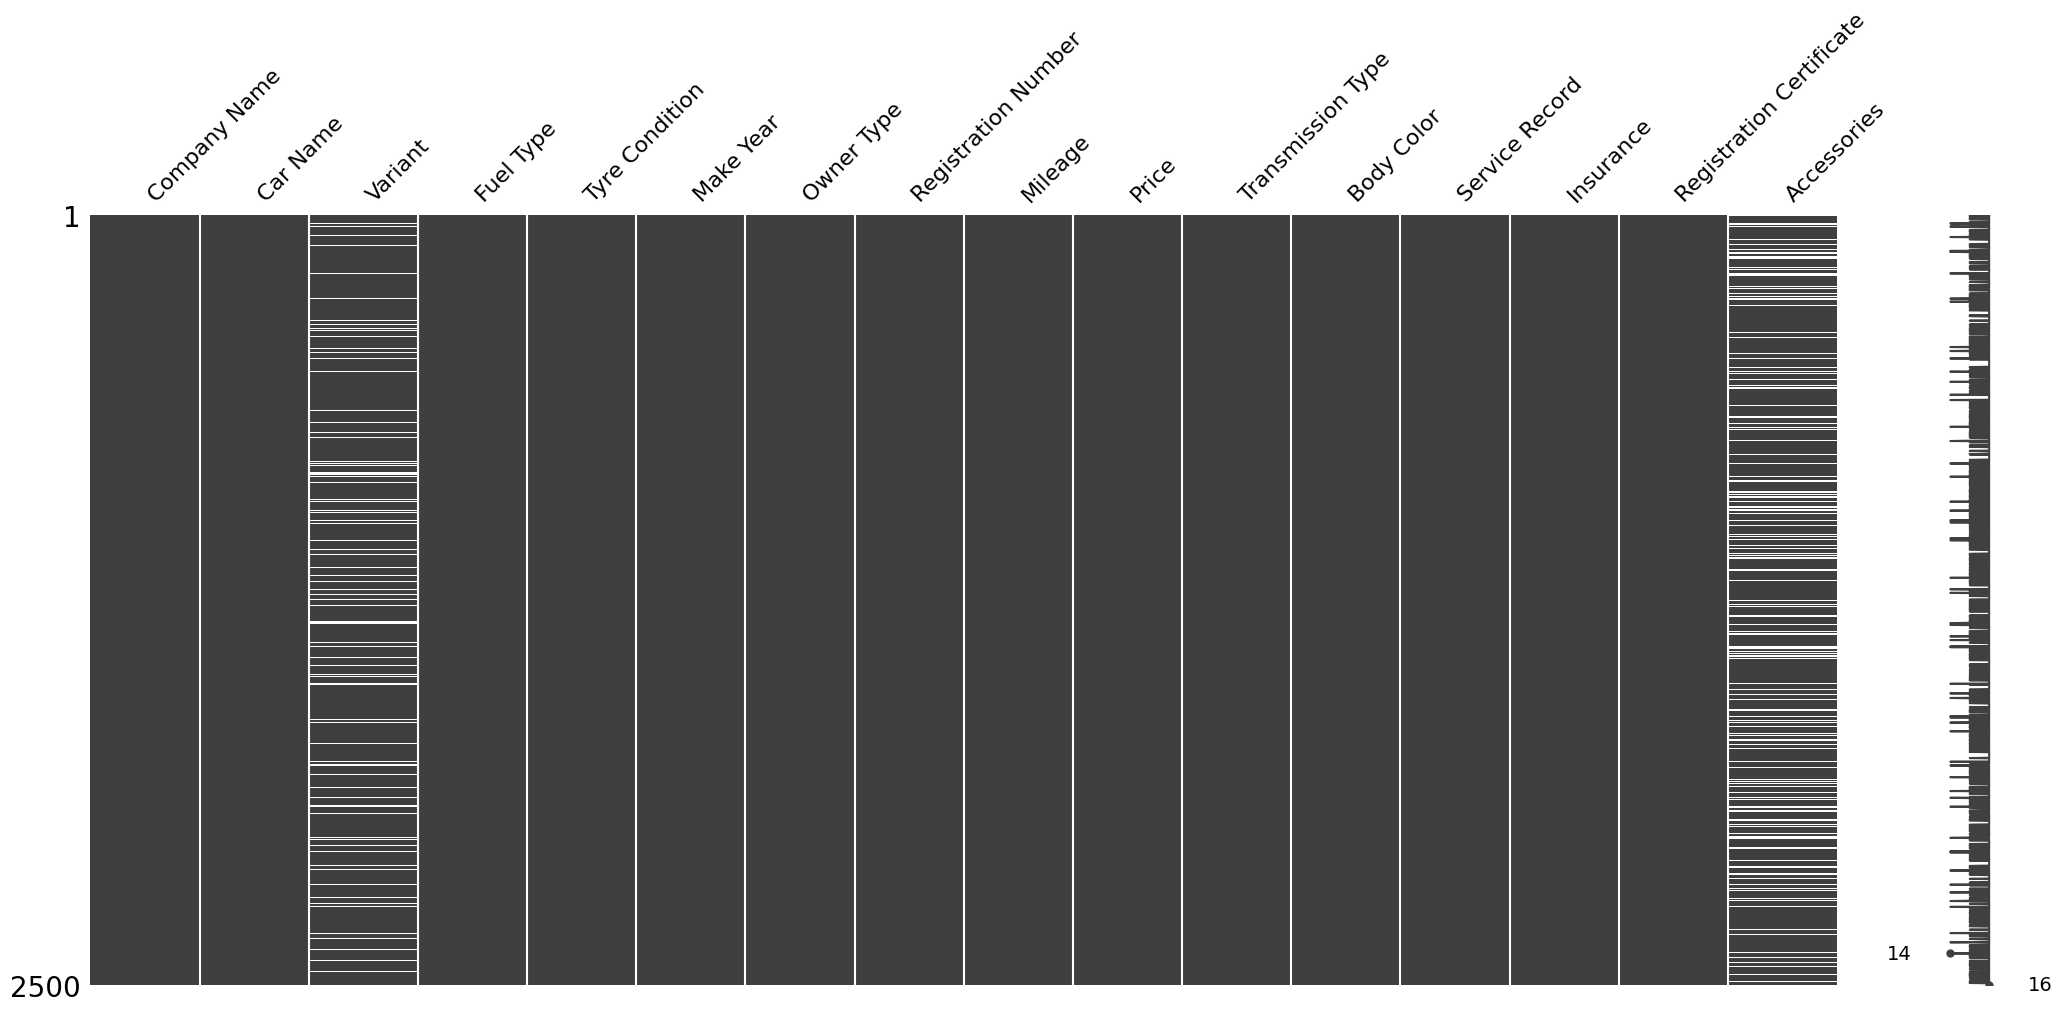

In [8]:
msno.matrix(cars)

In [9]:
cars['Accessories'] = cars['Accessories'].fillna(method='ffill')
cars['Variant'] = cars['Variant'].fillna(method='ffill')


<Axes: >

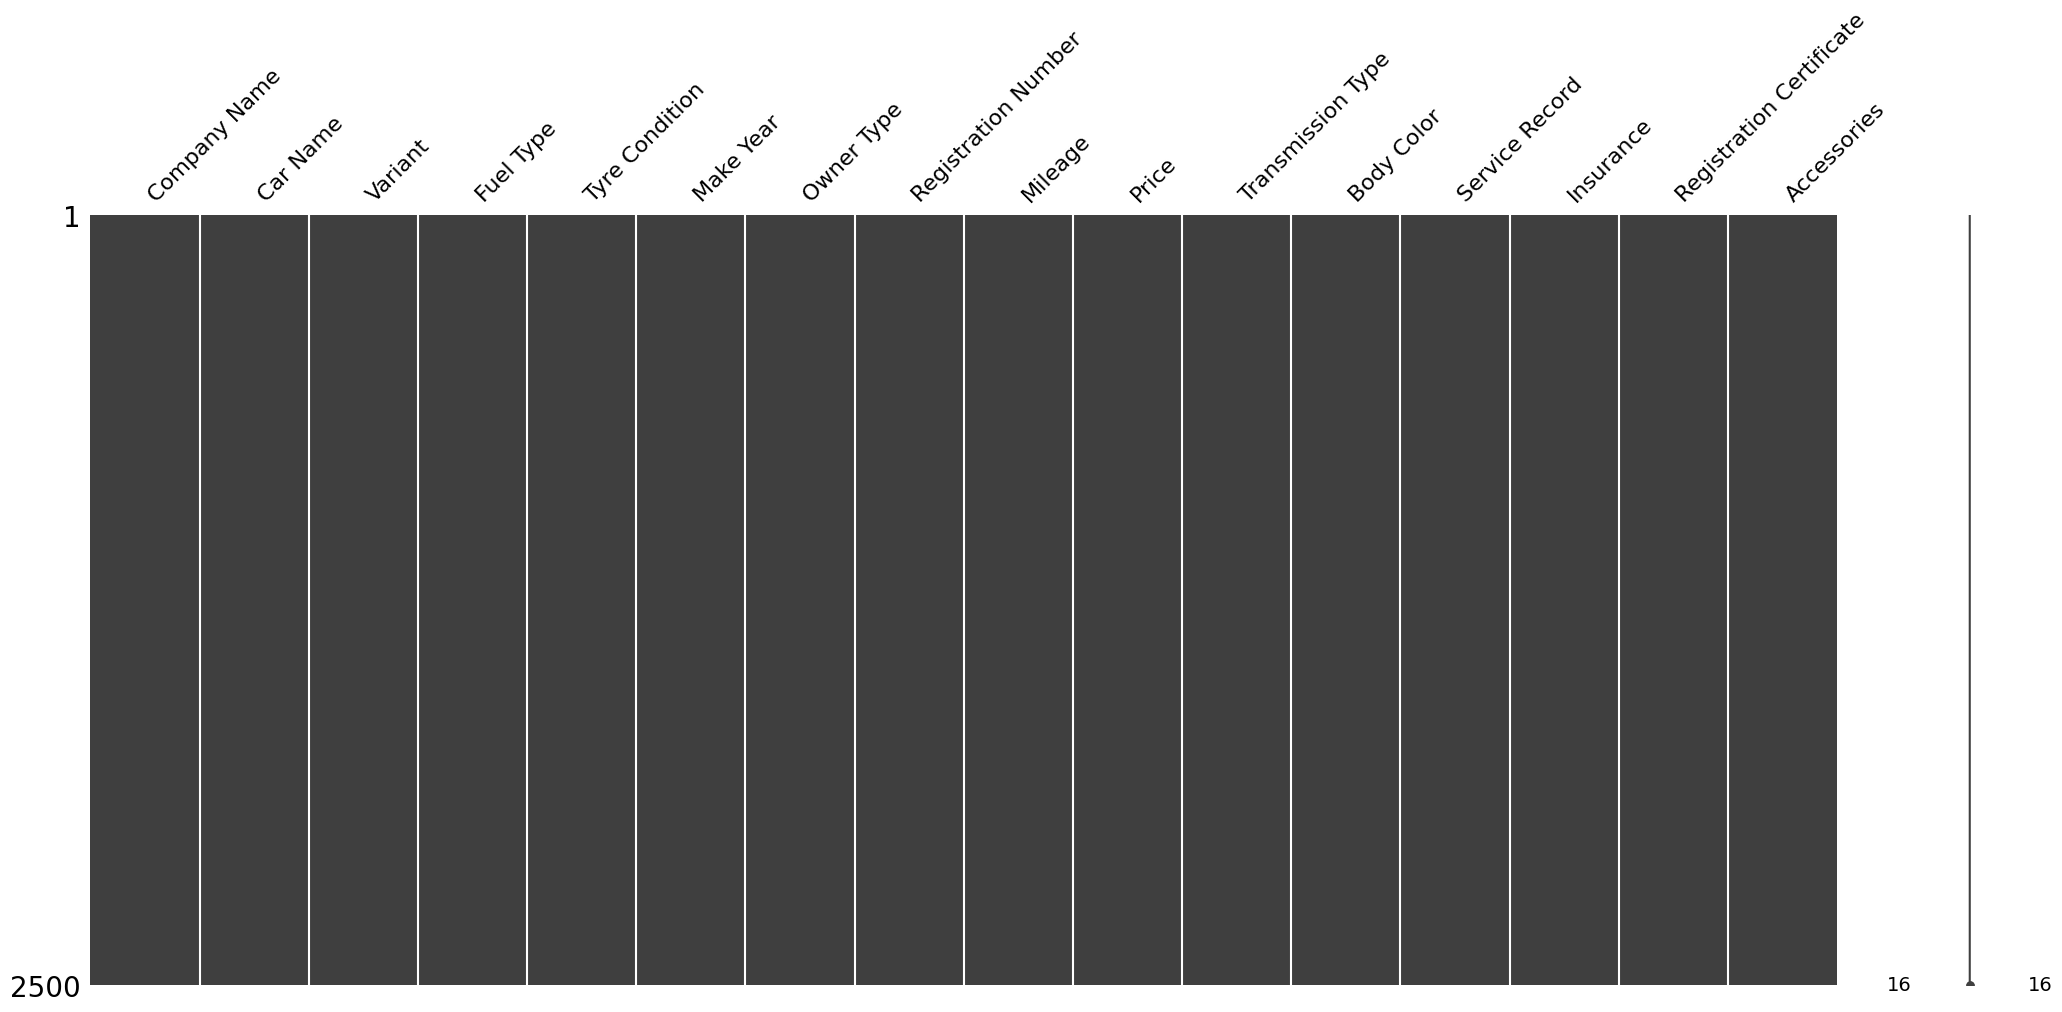

In [10]:
msno.matrix(cars)

In [11]:
cars.dtypes

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object

In [12]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to be encoded
columns_to_encode = [
    'Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
    'Owner Type', 'Registration Number', 'Transmission Type', 'Body Color',
    'Service Record', 'Insurance', 'Registration Certificate', 'Accessories'
]

# Apply LabelEncoder to each column
for column in columns_to_encode:
    cars[column] = le.fit_transform(cars[column])

# Display the DataFrame after encoding
print(cars)

      Company Name  Car Name  Variant  Fuel Type  Tyre Condition  Make Year  \
0                5         2        0          0               0       2018   
1                4         7        4          2               1       2020   
2                4         0        4          2               1       2022   
3                6         7        2          1               2       2024   
4                0         5        2          2               2       2018   
...            ...       ...      ...        ...             ...        ...   
2495             8         3        4          2               1       2015   
2496             4         8        3          0               0       2024   
2497             6         8        4          1               2       2022   
2498             2         9        7          0               0       2019   
2499             7         5        1          1               0       2024   

      Owner Type  Registration Number  Mileage   Pr

In [13]:
cars.dtypes

Company Name                int64
Car Name                    int64
Variant                     int64
Fuel Type                   int64
Tyre Condition              int64
Make Year                   int64
Owner Type                  int64
Registration Number         int64
Mileage                     int64
Price                       int64
Transmission Type           int64
Body Color                  int64
Service Record              int64
Insurance                   int64
Registration Certificate    int64
Accessories                 int64
dtype: object

Scaling data

In [15]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(cars.drop('Price',axis=1))

Performing PCA

In [16]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(scaled_data)

In [17]:
pca_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2'])
pca_df['Price']=cars['Price']
print(pca_df.head())

        PC1       PC2   Price
0 -0.518191  1.008545  759107
1 -0.414562 -0.322521  505071
2  0.190736 -0.595428  635322
3  1.014599  0.228246  483152
4 -0.052839  0.879242  712961


In [18]:
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.07594067 0.07341877]


Modeling using random forest regressor

In [20]:
# Features and target
X = pca_df.drop('Price', axis=1)
y = pca_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 68537781406.84849


Modeling without PCA reduced features

In [21]:
# Features and target
X = cars.drop('Price', axis=1)
y = cars['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 58116416032.79859
